# importing all the libraries

In [1]:
import numpy as np
import pandas as pd

# Getting the Training data

In [2]:
X = pd.read_csv("Downloads/Logistic_X_Train.csv")
Y = pd.read_csv("Downloads/Logistic_Y_Train.csv")
X.head(n=10)

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603
5,0.656532,0.991440,0.870280
6,1.453978,0.583741,1.277378
7,1.124756,1.116124,1.442579
8,-1.723841,-0.175289,-0.588835
9,-0.794138,1.958963,-0.270497


In [3]:
X = X.values
Y = Y.values

# Defining Logistic regression class

In [4]:
class logistic_regression:
    
    def __init__(self):
        print("logistic_regression_class_is_intiated")
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-(x)))
    
    
    def fit(self,X,Y,lr = 0.5):
        self.x = X
        self.y = Y
        self.theta = np.zeros((X.shape[1],1))
        
        print(self.x.shape,self.y.shape,self.theta.shape)
        error_list = []
        
        prev_loss = np.inf
        
        curr_loss = 0
        
        while prev_loss>curr_loss:
            error_list.append(self.error())
            prev_loss = self.error()
            grad = self.gradient()
            self.theta = self.theta+lr*grad
            curr_loss = self.error()
            #print(curr_loss.shape)
        return self.theta,error_list
        
    
    def hypothesis(self):
        a = np.dot(self.x,self.theta)
       # print(a.shape)
        return self.sigmoid(a)
    
    def error(self):
        y_hat = self.hypothesis()
        #print(y_hat.shape)
        error = np.sum((self.y*np.log(y_hat))+((1-self.y)*np.log(1-y_hat)))
        m = self.x.shape[0]
        error = -1*error
        return error/m
    
    def gradient(self):
        hi = self.hypothesis()
        grad = np.dot(self.x.T,(self.y-hi))
        m = self.x.shape[0]
        return grad/m
    
   

In [5]:
model = logistic_regression()
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

logistic_regression_class_is_intiated


In [6]:
theta,error = model.fit(X,Y)

(3000, 4) (3000, 1) (4, 1)


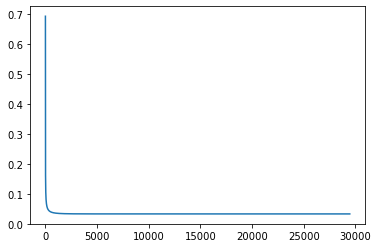

In [7]:
import matplotlib.pyplot as plt
plt.plot(error)
plt.show()

# Getting the testing Data set

In [10]:
test = pd.read_csv("Downloads/Logistic_X_Test.csv")
test = test.values
ones = np.ones((test.shape[0],1))
test = np.hstack((ones,test))

In [15]:
def test_output_predict(test,theta):
    return model.sigmoid(np.dot(test,theta))

In [21]:
import csv
with open("logistic_regression.csv","w") as f:
    csv_writer = csv.writer(f)
    header  = ["label"]
    csv_writer.writerow(header)
    output = test_output_predict(test,theta)
    output[output>=0.5]= 1
    output[output<0.5] = 0
    output = output.astype('int')
    csv_writer.writerows(output)

In [23]:
output = pd.read_csv("logistic_regression.csv")
print(output)

     label
0        1
1        1
2        0
3        1
4        1
..     ...
995      0
996      0
997      1
998      1
999      0

[1000 rows x 1 columns]
